In [1]:
import math
import numpy as np
import scipy.stats
import scipy.special
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
plt.ion()

# Exo 7 : Somme de distributions uniformes

Soit la variable aléatoire :
$$ Z =  \frac{1}{\sqrt{n}} \sum_{i=1}^{n} X_i $$
où les $X_i$ sont des variables aléatoires de distribution uniforme entre $-\frac{1}{2}$ et $\frac{1}{2}$.
Retrouver le théorème de la limite centrale pour cette distribution.



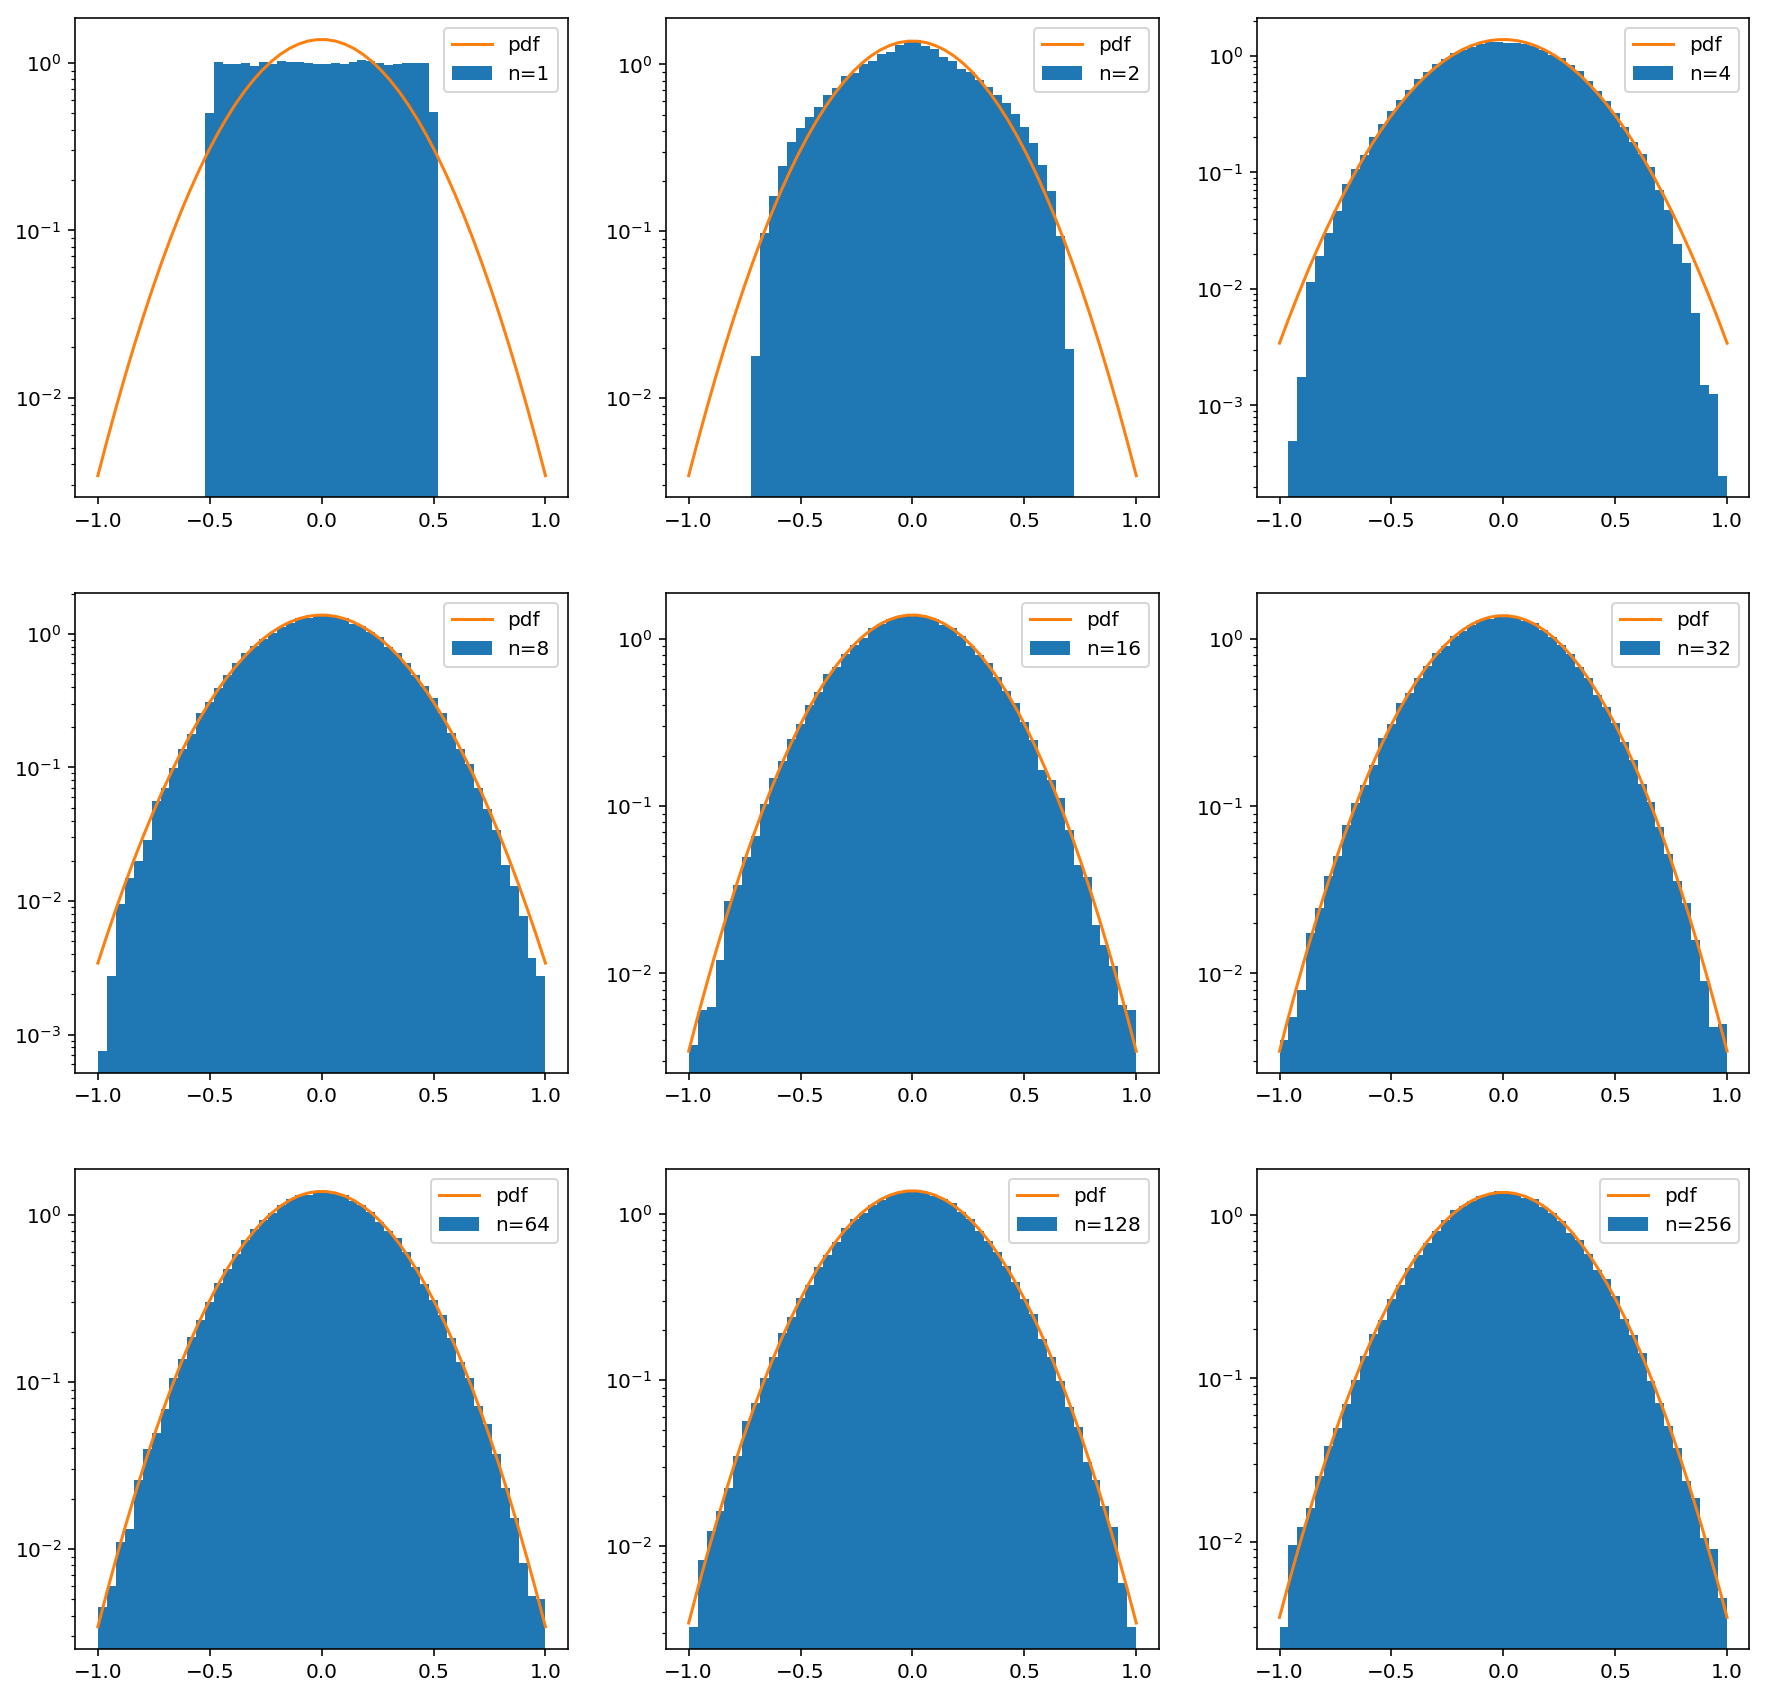

In [2]:
fig, axes = plt.subplots(3,3, figsize=(15, 15))
for n, ax in zip([1, 2, 4, 8, 16, 32, 64, 128, 256], axes.ravel()):
    ax.hist([np.sum(np.random.uniform(-.5, .5, size=n))/np.sqrt(n) for _ in range(100000)], np.linspace(-1, 1, 51), label=f'n={n}', density=True)
    x = np.linspace(-1, 1, 50)
    ax.plot(x, scipy.stats.norm.pdf(x,0, 1/np.sqrt(12)), label='pdf')
    ax.legend()
    ax.set(yscale='log')

# Exo 13 Simulation de la loi de Breit-Wigner
On reprend la variable aléatoire $X$ ayant pour fonction densité de probabilité (loi de Breit-Wigner) :
$$ f(x) = \frac{1}{\pi} \frac{\Gamma/2}{ (\Gamma/2)^2 + ( x - \mu)^2 } $$
proposer une méthode pour générer une séquence de nombres aléatoires distribués selon cette loi.

Soit $X_0$ la v.a. de Breit-Wigner (ou loi de Cauchy) pour $\Gamma = 2$ et $\mu = 0$, on a :
$$F_0(x) = \int_{-\infty}^x f_0(u) du = \frac{1}{\pi} \arctan x +\frac{1}{2} $$

et $$r\sim \text{unif}[0,1] \Rightarrow  \tan \left( \pi r -\frac{\pi}{2}   \right)\sim f_0(x)$$


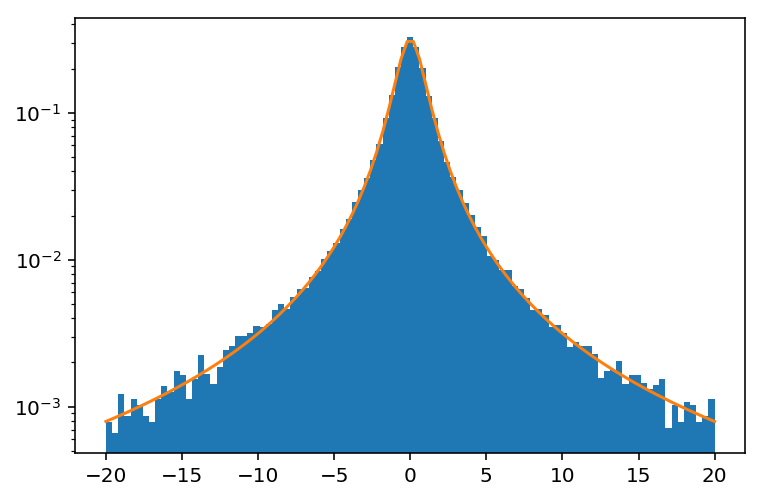

In [3]:
r = np.random.random(100000)
x0 = np.tan(np.pi*(r-.5))
plt.hist(x0, np.linspace(-20,20,100), density=True);
x = np.linspace(-20,20,100)
y0 = 1/(1+x*x)/np.pi
plt.plot(x, y0)
plt.yscale('log')

Pour $\Gamma$ et $\mu$, quelconques, on a 
$$X =  \frac{\Gamma}{2} X_0 + \mu $$
Que l'on peut générer 

In [4]:
Gamma = 4
mu = 2
x1 = Gamma/2*x0 + mu

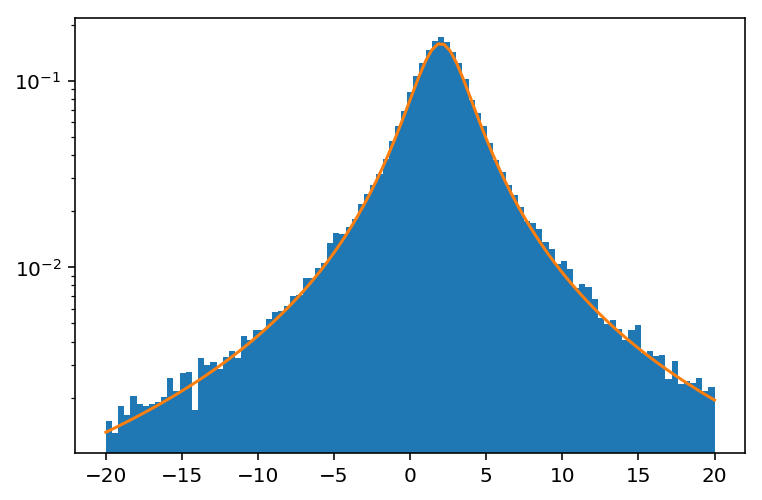

In [5]:
plt.hist(x1, np.linspace(-20,20,100), density=True);
y0 = Gamma/2/np.pi*1/((Gamma/2)**2+(x-mu)**2)
plt.plot(x, y0)
plt.yscale('log')

# Exo 14 : Simulation d'une variable discrète
Soit $X$ une loi géométrique de paramètre $p$ ($0<p<1$): 
			$$P(X = n) = p(1 - p)^{(n-1)} \textrm{ pour } n > 0 $$

### 1. Quel processus est décrit par cette variable aléatoire ?

Cette variable aléatoire peut correspondre par exemple au nombre de tentatives avant un premier succès pour un processus de Bernoulli avec une probabilité de succés $p$.

### 2. Rappeler la méthode classique de simulation de X à l'aide de tirages à pile ou face.

La méthode consiste à simuler le processus, on compte le nombre de tentatives jusqu'à avoir un succès :

In [6]:
def gene1(p):
    n=0
    while True:
        n = n+1
        if np.random.random()<p: 
            return n
        

### 3. Donner une autre méthode de simulation de cette loi utilisant la fonction de répartition. 

On a :
$$ \sum_{i>0} P(X=i) = 1$$
Si on partitionne le segment [0,1] avec des segments de longueurs $P(X=i)$ pour $i = 1, \ldots, \infty$. 
Les bornes de ces segments sont données par 
$$F_n = \sum_{i=1}^n P(X=i) = 1 - (1-p)^n.$$
La probabilité qu'un nombre tiré uniformément entre 0 et 1 appartienne au segment $[F_{n-1}, F_n]$ est
 $$p_n = P(X=n) = F_n - F_{n-1}$$
 ![](exo14.png)
 Soit $x$ un nombre entre 0 et 1, on cherche l'intervalle $[F_{n-1}, F_n]$ auquel il appartient :
 $$ 1 - (1-p)^{n-1} \le x < 1 - (1-p)^{n} $$
 $$ (1-p)^{n-1} \ge 1-x  > 1 - (1-p)^{n} $$
 $$ {n-1} \le \frac{\log(1-x)}{\log(1-p)}  <n $$
 Soit :
$$ n = \left[\frac{\log(1-x)}{\log(1-p)}\right] +1 $$
d'où la méthode suivante

In [7]:
def gene2(p):
    return int((math.log(1.-np.random.random())/math.log(1-p))+1.)
        
# version utilisant numpy pour générer une sequence de taille '''size'''
def gene2np(p, size=1):
    return np.floor((np.log(1.-np.random.random(size))/np.log(1-p))+1.)

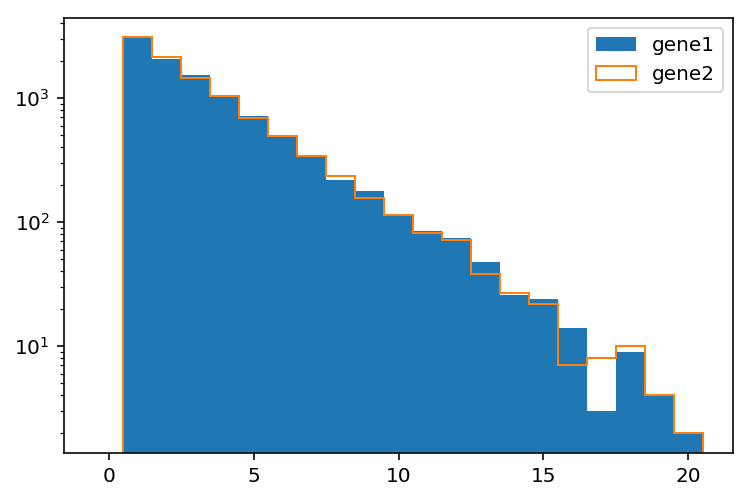

In [12]:
plt.figure()
p = .3
N = 10000
bins = np.linspace(-.5, 20.5, 22)
plt.hist([gene1(p) for i in range(N)], bins,log=True, label='gene1')
#plt.hist([gene2(p) for i in range(N)], bins, histtype='step', label='gene2', lw=2)
plt.hist(gene2np(p, N), bins, histtype='step', label='gene2')
plt.legend()

### 4. Comparer l'efficacité des deux méthodes 

La deuxième méthode est plus efficace car elle consome un seul nombre aléatoire alors que la première en consome en moyenne $1/p$

# Exo 15 : Conditionnement et inversion
Soient les variables aléatoires $(X,Y)$ ayant pour fonction densité de probabilité jointe :
	$$ f(x,y) = yx^{y-1}e^{-y} \textrm{ pour } y>0 \textrm{ et } 0<x<1.$$

### 1. Quelle est la fonction densité de probabilité associée à Y ?

$$ f(y) = \int_0^1  yx^{y-1}e^{-y} dx = e^{-y}$$

### 2. En déduire le fonction densité de probabilité conditionelle associée à X sachant Y

$$ f(x| y) = \frac{f(x,y)}{f(y)} =  yx^{y-1}$$

### 3. Proposer une méthode pour générer une séquence de nombres aléatoires $(x,y)$ distribués selon cette loi.

Il suffit de générer $y$ puis $x$ :

/Users/derome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app
/Users/derome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
/Users/derome/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1560: RuntimeWarning: invalid value encountered in less_equal
  z = ma.masked_where(z <= 0, z)
/Users/derome/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


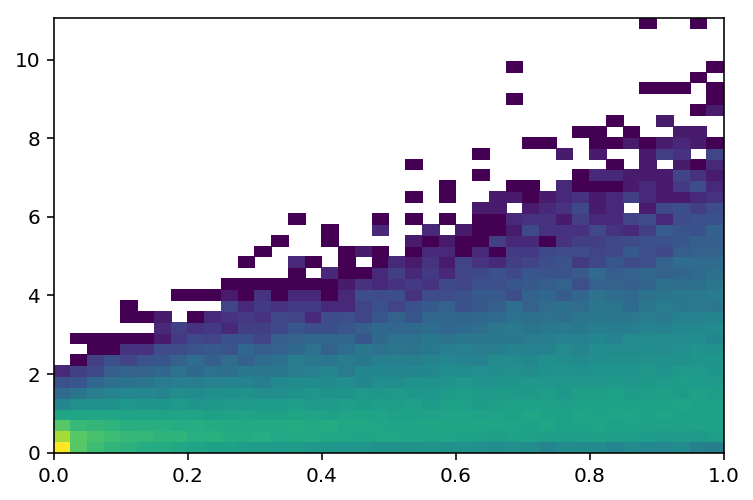

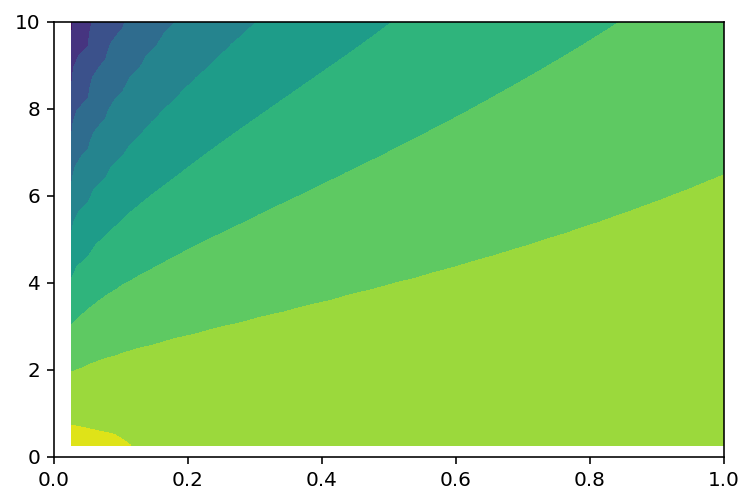

In [13]:
def gene(size=1):
    y = -np.log(1-np.random.random(size))
    x = np.power(np.random.random(size), 1./y)
    return x, y


from matplotlib.colors import LogNorm
plt.figure()
h2 = plt.hist2d(*gene(100000),bins=40, norm=LogNorm(), normed=True)

plt.figure()
x = np.linspace(0,1,40)
y = np.linspace(0,10,40)
xm, ym = np.meshgrid(x,y)
plt.contourf(xm,ym,ym*np.power(xm,(ym-1))*np.exp(-ym), norm=LogNorm())

# Exo 16 : Méthode de la réjection
On veut simuler une loi normale $N(0,1)$ en utilisant comme proposition une loi de Laplace de paramètre $\lambda > 0$, de fonction densité de probabilité :
			 $$ g(x) = \frac{\lambda}{2}e^{-\lambda |x|}$$


### 1. Déterminer la valeur de $\lambda$ qui permet de minimiser la probabilité de rejet. 

Soit $$f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2} x^2}$$ et 
$$ h(x) = \frac{m g(x)}{f(x)} = \frac{m \lambda \sqrt{2\pi}}{2}e^{\frac{1}{2}x^2 -\lambda |x|}$$.
On doit avoir $h(x) \le 1$. Pour $x>0$, la fonction est minimale en $x=\lambda$ (et en  $-\lambda$ por $x<0$) et vaut :
$$ \frac{m \lambda \sqrt{2\pi}}{2}e^{-\frac{1}{2}\lambda^2}$$
Le paramètre m optimum pour un $\lambda$ donné ($h(\lambda)=1$, meilleure efficacité) est donc :
$$ m = \sqrt{\frac{2}{\pi}} \frac{1}{\lambda} e^{\frac{\lambda^2}{2}} $$
Le paramètre m est optimum pour :
$$ \frac{d m}{d \lambda} =  \sqrt{\frac{2}{\pi}} \frac{1}{\lambda^2} (  \lambda^2 e^{\frac{\lambda^2}{2}} -  e^{\frac{\lambda^2}{2}} )   = 0$$
soit en $\lambda = 1$

In [14]:
x = np.linspace(-5,5,500)
y_gauss = 1./np.sqrt(2.*np.pi)*np.exp(-.5*x**2)
def plot_lambda(lmbda):
    m = np.sqrt(2./np.pi)/lmbda*np.exp(.5*lmbda**2)
    y_laplace = lmbda/2. * np.exp(-lmbda*abs(x))
    plt.plot(x,y_gauss)
    plt.plot(x,y_laplace*m)

interact(plot_lambda, lmbda = FloatSlider(min=.3, max=3.))
#, freq= FloatSlider(min=.2, max=2., step=.1, continuous_update=False), tau=FloatSlider(min=1., max=10., step=.1, continuous_update=False))

interactive(children=(FloatSlider(value=0.3, description='lmbda', max=3.0, min=0.3), Output()), _dom_classes=(…

<function __main__.plot_lambda(lmbda)>

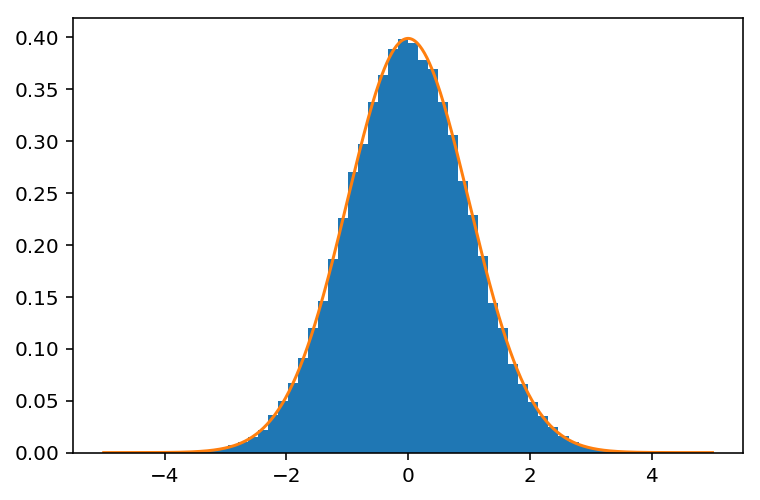

In [15]:
def gene():
    m = 1.3154892469589139
    while 1:
        x = np.log(np.random.random())*np.random.choice([-1.,1.])
        y = .5*np.exp(-abs(x))*m
        yt = np.random.random()*y
        if yt<1./np.sqrt(2.*np.pi)*np.exp(-.5*x**2):
            return x
plt.hist([gene() for i in range(100000)], 50, density = True)
plt.plot(x,y_gauss)


### 2. Quelle est l'efficacité de cette méthode

l'efficacité de cette méthode est $1/m$, soit 

In [16]:
1./(np.sqrt(2./np.pi)*np.exp(.5))

0.7601734505331403

# Exo 17 : Comparaison de méthodes                                         

Soit $X$ une variable aléatoire de fonction de répartition :
$$F(x) = 0 \textrm{ pour } x<0, F(x) = 1 \textrm{ pour } x > 1, 
F(x)= \frac{1}{2} ( x+x^2 ) \textrm{ pour }  0 < x <  1 $$

### 1. Décrire une méthode de réjection pour simuler cette variable aléatoire

$$f(x) = F'(x) =  \frac{1}{2}+x$$

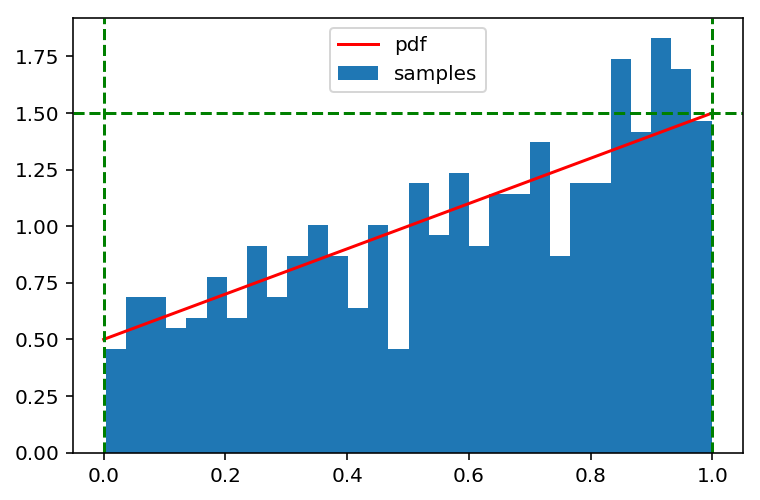

In [17]:
def mypdf(x):
    return .5+x
        
samples = []
ntrial = 1000

xmin = 0.
xmax = 1.
xpdf = np.linspace(xmin, xmax, 100)
ypdf = mypdf(xpdf)
ymax = max(ypdf)

for i in range(ntrial):
    x = np.random.uniform(xmin, xmax)
    y = np.random.uniform(0,ymax)
    if y<mypdf(x):
        samples.append(x)

plt.hist(samples, bins=30, density=1, label='samples')
plt.plot(xpdf,ypdf, 'r',label='pdf')
plt.axvline(xmin, linestyle='--',color='g')
plt.axvline(xmax, linestyle='--',color='g')
plt.axhline(ymax, linestyle='--',color='g')
plt.legend(loc=0)

### 2.  Décrire une méthode de transformation pour simuler cette variable aléatoire

Si $y \sim \mathrm{unif}_{[0,1]} \rightarrow F^{-1}(y) \sim f(x)$. Ici
    $$F^{-1}(y) = \frac{-1+\sqrt{1+8y}}{2}$$

/Users/derome/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


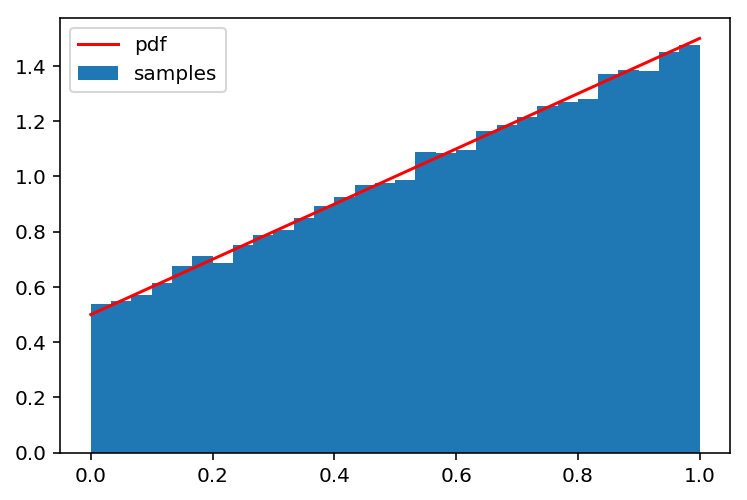

In [18]:
y = np.random.random(100000)
samples = (-1+np.sqrt(1+8*y))/2.
plt.hist(samples, bins=30,normed=1, label='samples')
plt.plot(xpdf,ypdf, 'r',label='pdf')
plt.legend(loc=0)

### 3.  Soit $g$ une densité qui se décompose sous la forme $g(x) = p g_1(x)+(1-p)g_2(x)$, où  $0<p<1$ est connu, et $g_1$ et $g_2$ sont deux fonctions densités de probabilités selon lesquelles on sait générer des séquences de nombres aléatoires. Expliquer comment générer une séquence de nombre aléatoire suivant la loi $g$. Appliquer au cas $f$.

$X$ peut-être vu comme la combinaison (attention pas la somme) de 2 v.a. $X_1 \sim g_1(x)$ avec une prob. $p$ et $X_2 \sim g_2(x)$ avec une prob. $(1-p)$.

Ici on peut écrire $f(x) = \frac{1}{2} 1 + \frac{1}{2} (2x)$. On génère un premier nombre aléatoire $r \sim \mathrm{unif}_{[0,1]}$, si $r<1/2$, on utilise $g_1(x)$ pour générer le nombre aléatoire, sinon on utilise $g_2(x)$. On peut utiliser la méthode de transformation : ici $F_1(x) = x$ et $F_2(x) = x^2$ pour $0 \leq x \leq 1$.

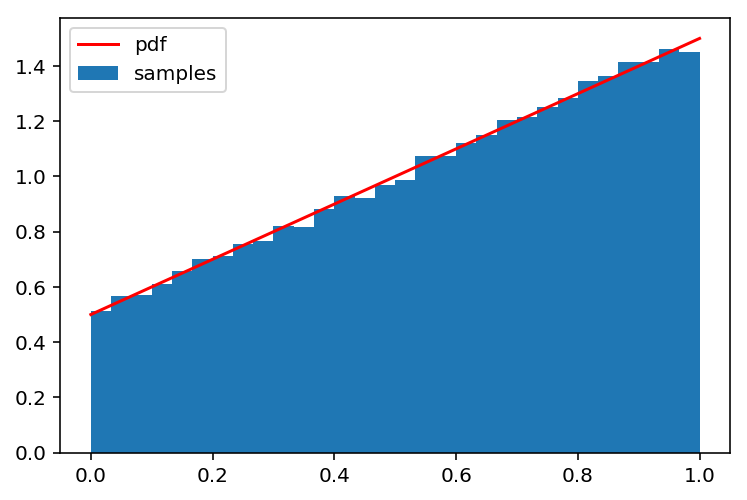

In [19]:
N = 100000
p = np.random.random(N)
y = np.random.random(N)
samples = np.array(p)
samples[p<.5] = y[p<.5]
samples[p>=.5] = np.sqrt(y[p>=.5])
plt.hist(samples, bins=30,normed=1, label='samples')
plt.plot(xpdf,ypdf, 'r',label='pdf')
plt.legend(loc=0)

### 4. Des trois méthodes proposées, laquelle vous semble la plus pertinente pour générer une grande séquence de nombres aléatoires suivant la loi $f$.

La première est la moins performante (efficacité $\frac{1}{3}$). La deuxième est la plus performante (efficacité $1$). La troisième a une efficacité de $\frac{1}{2}$ mais elle plus générique.

# Exo 18 : Distribution d'un estimateur
Considérons $n$ mesures indépendantes d'une variable de
distribution exponentielle : $$f(x) = \frac{1}{\tau} \exp \left( - \frac{x}{\tau} \right) $$ 
où $\tau$ est inconnu.


### 1. Déterminer l'estimateur $\hat{\tau}$  à l'aide de la méthode du maximum de vraisemblance.

La fonction de vraisemblance est donnée
$$L(\tau) = \prod_{i=1\ldots n} f(x_i) = \prod_{i=1\ldots n} \frac{1}{\tau} \exp \left( - \frac{x_i}{\tau} \right) = \frac{1}{\tau^n}\exp \left( - \frac{1}{\tau}\sum_{i=1\ldots n} x_i \right)$$
et
$$
\log L(\tau) = -n \log \tau - \frac{1}{\tau}\sum_{i=1\ldots n} x_i.$$
Le maximum de la fonction de vraisemblance est obtenu pour :
$$
\frac {d \log L}{d \tau} = - \frac{n}{\tau} +  \frac{1}{\tau^2} \sum_{i=1\ldots n} x_i = 0
$$
soit pour 
$$
\tau = \frac{1}{n}\sum_{i=1\ldots n} x_i
$$
L'estimateur est donc donnée par :
$$
\hat{\tau} = \frac{1}{n}\sum_{i=1\ldots n} X_i
$$

### 2. Déterminer la fonction caractéristique de l'estimateur.

$$ \phi_{\sum_{i=1\ldots n} X_i} (t) = \prod_{i=1\ldots n}\phi_{X_i}(t) $$
où
$$ \phi_{X_i}(t)  = \frac{1}{1-it\tau}$$
d'où
$$ \phi_{\sum_{i=1\ldots n} X_i}(t)  = \frac{1}{(1-it\tau)^n}$$
et
$$ \phi_{\hat{\tau}}(t)  = \frac{1}{\left(1-\frac{it\tau}{n}\right)^n}$$

### 3. Déterminer la fonction densité de probabilité de l'estimateur.

La fdp de $\sum_{i=1\ldots n} X_i$ est donnée par la distribution $\Gamma$:
   $$ f_{\Sigma}(x) = \frac{1}{\Gamma(n)\tau^n} x^{n-1} e^{-x/\tau}.$$ 
La fdp de $\hat{\tau}$ est donc :
  $$ f_\tau(x) = n f_{\Sigma}(n x) = \frac{n}{\Gamma(n)\tau^n} (n x) ^{n-1} e^{-n x/\tau} $$

### 4. Calculer la valeur moyenne et la variance de l'estimateur. L'estimateur est-il biaisé ? est-il efficace ?

La moyenne $\sum_{i=1\ldots n} X_i$ est $n \tau$ et la variance $n \tau^2$.
La moyenne $\hat{\tau}$ est donc  $\tau$ et sa variance $\tau^2/n$ .

### 5. Montrer que pour $n$ grand, la distribution de l'estimateur devient une gaussienne.

$$ \lim_{n \rightarrow \infty} \left(1+\frac{\alpha}{n}\right)^n = lim_{n \rightarrow \infty} e^{n \log(1 + \frac{\alpha}{n})} = e^{\alpha - \frac{\alpha^2}{2n}} $$

$$ \lim_{n \rightarrow \infty} \frac{1}{\left(1-\frac{it\tau}{n}\right)^n} = e^{it\tau}  e^{-\frac{t^2\tau^2}{2n}} $$
soir la fonction caractéristique d'une gaussienne de moyenne $\tau$ et de variance $\tau^2/n$.

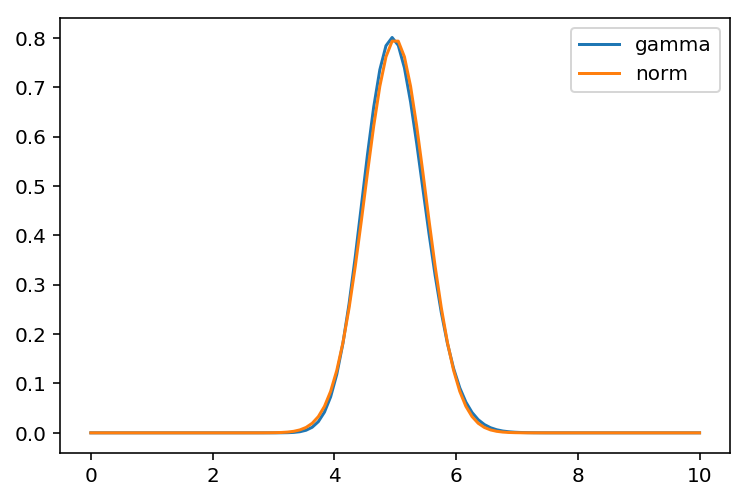

In [20]:
x = np.linspace(0, 10, 100)
n = 100
tau = 5
plt.plot(x, n * scipy.stats.gamma.pdf(n * x, n, loc=0, scale=tau), label='gamma')
plt.plot(x, scipy.stats.norm.pdf(x, tau, tau/np.sqrt(n)), label='norm')
plt.legend()

### 6. Une expérience a effectuée 10 mesures du temps de vie de pions :
$$
\begin{array}{|l|c|c|c|c|c|c|c|c|c|c|}
\hline
\textrm{Temps de vie (ns)} &42.70 &17.90 &18.81 &20.42 &2.66 &18.66 &21.91 &0.90 &41.63 &32.66 \\ 
\hline
\end{array}
$$
A partir de ces 10 mesures, estimer le temps de vie moyen du pion et l'intervalle de confiance à 95 %.



In [21]:
t = np.array([42.70 ,17.90 ,18.81 ,20.42 ,2.66 ,18.66 ,21.91 ,0.90 ,41.63 ,32.66])
tau = np.mean(t)
n = len(t)
print (f'𝜏 = {tau:.1f} ± {2*tau/np.sqrt(n):.1f}')

𝜏 = 21.8 ± 13.8


Dans l'approche fréquentiste, l'égalité ci-dessus s'interprète de la façon suivante : la probabilité que l'intervalle 21.8 ± 13.8 contienne la vrai valeur de $\tau$ est 95%.

In [22]:
def exo18(n = 10, tau0 = 20):
    x = np.linspace(0,tau0*2.2, 200)
    plt.plot(x,n*scipy.stats.gamma.pdf(x*n,n, scale=tau0), label='gamma')
    plt.plot(x,scipy.stats.norm.pdf(x,tau0,tau0/np.sqrt(n)), label='gauss')
    plt.legend()
interact(exo18,  n = IntSlider(min=5, max=200, step =5), tau0 = FloatSlider(min=5, max=50, step =1))

interactive(children=(IntSlider(value=5, description='n', max=200, min=5, step=5), FloatSlider(value=5.0, desc…

<function __main__.exo18(n=10, tau0=20)>

### 7. Estimation bayesienne

Déterminer le postérior associé au paramètre $\tau$. Quelle est sa valeur moyenne, sa variance. En déduire le niveau de confiance associé à $<\tau> \pm 2\sigma$. Etudier les deux hypothèses suivantes :
- Prior uniforme $\pi(\tau) \propto 1$ pour $\tau < 100$ ns. 
- Prior log-uniforme $\pi(\tau) \propto 1/\tau$ pour $1 <\tau < 100$ ns.

$$L(\tau) = \prod_{i=1\ldots n} f(t_i) = \prod_{i=1\ldots n} \frac{1}{\tau} \exp \left( - \frac{t_i}{\tau} \right) = \frac{1}{\tau^n}\exp \left( - \frac{1}{\tau}\sum_{i=1\ldots n} t_i \right)$$
et le postérior est donné par:
$$f(\tau | t_1 \ldots t_{10}) \propto L(\tau) \pi(\tau)$$

 E(𝜏) = 27.2, V(𝜏) = 102.7  𝜎(τ) = 10.1, Niveau de confiance de E(𝜏)±2𝜎(τ): 95.6%
 E(𝜏) = 24.2, V(𝜏) = 72.7  𝜎(τ) = 8.5, Niveau de confiance de E(𝜏)±2𝜎(τ): 95.6%


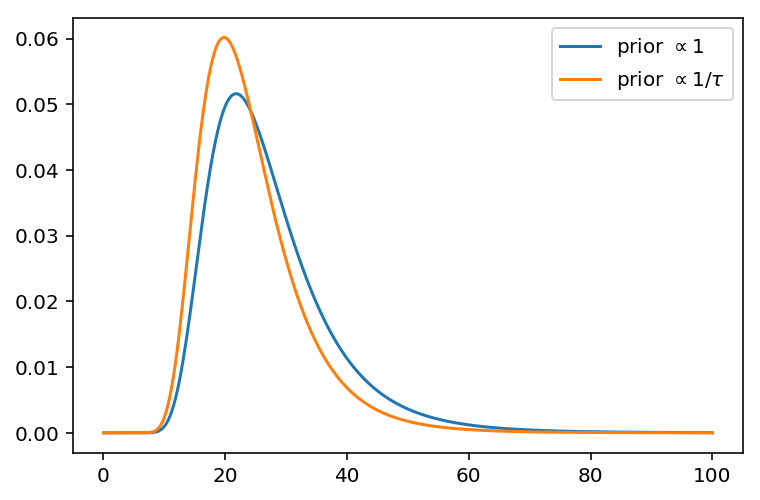

In [23]:
tau = np.linspace(0.1, 100, 1000)
n = len(t)
t0 = 100

f0 = 1/(tau)**n * np.exp(-(np.sum(t))/tau) * (tau<t0)
f0 /= scipy.integrate.simps(f0, tau)

f1 = 1/(tau)**n * np.exp(-(np.sum(t))/tau) * (tau<t0) / tau
f1 /= scipy.integrate.simps(f1, tau)

plt.plot(tau, f0, label='prior $\propto 1$')
plt.plot(tau, f1, label=r'prior $\propto 1/\tau$')
plt.legend()

for f in [f0, f1]:
    mean = scipy.integrate.simps(f * tau, tau)
    var =  scipy.integrate.simps(f * (tau-mean)**2 , tau)

    nc = scipy.integrate.simps(f*(tau>mean-2*np.sqrt(var))*(tau<mean+2*np.sqrt(var)), tau)
    print(f' E(𝜏) = {mean:.1f}, V(𝜏) = {var:.1f}  𝜎(τ) = {np.sqrt(var):.1f}' \
        f', Niveau de confiance de E(𝜏)±2𝜎(τ): {100*nc:.1f}%')

# Exo 19 : Estimation de la fréquence d'un processus de Poisson
On veut mesurer la fréquence $\nu$ d'un processus aléatoire (Processus de
Poisson). Pour estimer la valeur de $\nu$ on effectue 10 mesures
correspondant chacune au comptage du nombre d'événements durant 1
minute. On trouve :
$$
\begin{array}{|l|c|c|c|c|c|c|c|c|c|c|}
\hline
\textrm{Comptage} & 6 & 7 &  3 & 8 & 8 & 5 & 7 & 4 & 2 & 10 \\
\hline
\end{array}
$$
### 1. Déterminer l'estimateur $\hat{\nu}$ de la fréquence à l'aide de la méthode du maximum de vraisemblance.

La fonction de vraisemblance est donnée par :
$$ L(\nu) = \prod_{i = 1 \ldots n} P(c_i) =  \prod_{i = 1 \ldots n} \frac{(T\nu)^{c_i}}{c_i !}e^{-T\nu} = e^{-n T\nu} (T\nu)^{\sum_{i = 1 \ldots n} c_i} \prod_{i = 1 \ldots n}\frac{1}{c_i !}$$
soit
$$ \log  L(\nu) = -n T \nu + \left(\sum_{i = 1 \ldots n} c_i \right) \log \left(T \nu \right)  + \textrm{cst}.$$
Le maximum de la fonction de raisemblance est donné par :
$$ \frac{d\log  L(\nu)}{d \nu}  = -n T + \left(\sum_{i = 1 \ldots n} c_i \right) \frac{1}{\nu} = 0 $$
pour
$$ \nu = \frac{1}{n T} \sum_{i = 1 \ldots n} c_i$$
et l'estimateur est donc donné par 
$$\hat{\nu}= \frac{1}{n T} \sum_{i = 1 \ldots n} X_i$$

### 2. Quelle est la variance de l'estimateur, est-il efficace ?

$$V(\hat \nu) = \frac{1}{T^2 n^2}\sum_{i = 1 \ldots n} V(X_i) = \frac{\nu}{ T n} $$ 

$$ \frac{d^2\log  L(\nu)}{d \nu^2}  =  -\left(\sum_{i = 1 \ldots n} c_i \right) \frac{1}{\nu^2}$$

$$ \frac{1}{E\left( - \frac{d^2\log  L(\nu)}{d \nu^2}\right)} =  \frac{\nu}{T n} $$ 

# Exo 20 : Mesure de l'accélération gravitationnelle
Un dispositif est constitué d'un tube à vide et d'un électro-aimant
retenant une bille. A $t=0$, la bille est lâchée en coupant
l'alimentation de l'électro-aimant. On mesure les temps de passage de
la bille à des distances fixes (incertitude négligeable) :

$$
\begin{array}{|l|ccccc|}
\hline
\textrm{Distance d (m)} & .20 & 1.00 & 2.00 & 3.00 & 5.00 \\ \hline
\textrm{Temps t (s)}      & .16 & .40 & .58 & .72 & .97 \\
\hline
\end{array}
$$

L'incertitude sur les mesures de temps est de 0.01 s.

### 1. Dans un premier temps on suppose que le système de libération de la bille a un temps de réponse nul. Déterminer $g$ et l'incertitude associée à l'aide de la méthode des moindres carrés.

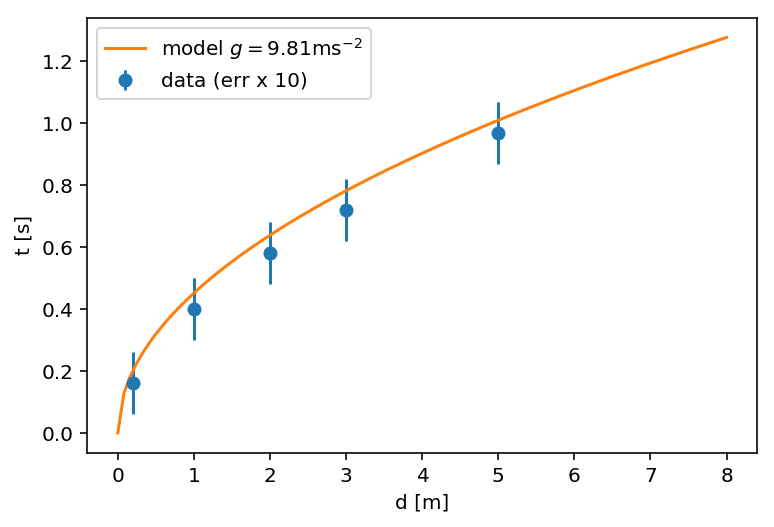

In [24]:
d = np.array([.20, 1.00, 2.00, 3.00, 5.00])
t = np.array([.16, .40, .58, .72, .97])
sigma = .01
plt.errorbar(d,t,fmt='o',yerr=10*sigma, label='data (err x 10)')
dd = np.linspace(0, 8, 100)
tt = np.sqrt(2 * dd / 9.81)
plt.plot(dd, tt, label=r'model $g=9.81\mathrm{ ms}^{-2}$')
plt.xlabel('d [m]')
plt.ylabel('t [s]')
plt.legend()

Ici, les erreurs sur les données ont été multipliées par 10 pour être visibles. 

La fonction $\chi^2$ est donnée par :

$$\chi^2(g) = \frac{1}{\sigma^2}\sum_{i=1\ldots n} \left( t_i - \sqrt{\frac{2 d_i}{g}}\right)^2$$

$$\frac{ d\chi^2}{d g} =  \frac{1}{\sigma^2}\sum_{i=1\ldots n}\frac{\sqrt{2 d_i}}{g^{3/2}} \left( t_i - \sqrt{\frac{2 d_i}{g}}\right)  =  \frac{1}{\sigma^2}\sum_{i=1\ldots n}\frac{\sqrt{2 d_i} t_i}{g^{3/2}}-  \frac{1}{\sigma^2}\sum_{i=1\ldots n} \frac{2 d_i}{g^{2}}= 0 $$

pour
$$\overline{\sqrt{d} t} -\sqrt{2} \frac{\overline{d}}{\sqrt{g}} = 0$$
soit
$$ g = 2 \left(  \frac{\overline{d}}{\overline{\sqrt{d} t}}  \right)^2$$



L'erreur peut être estimée à partir de :
$$\frac{ d^2\chi^2}{d g^2}  = \frac{1}{\sigma^2} (-3\frac{\sqrt{2}}{2}\frac{n \overline{\sqrt{d} t}}{g^{5/2}}+ 4 \frac{n \overline{d}}{g^{3}})$$

$$\Delta g = \frac{1}{\sqrt{ \frac{1}{2}\frac{ d^2\chi^2}{d g^2}}}$$

In [25]:
g = 2*(np.sum(d)/np.sum(np.sqrt(d)*t))**2
delta_g = sigma/np.sqrt(.5*(-3/np.sqrt(2)*np.sum(np.sqrt(d)*t)/g**(5./2.) + 4.*np.sum(d) / g**3.))
print ('g =', g, '+/-', delta_g, 'm/s2')

g = 11.319281444524108 +/- 0.16092898573951148 m/s2


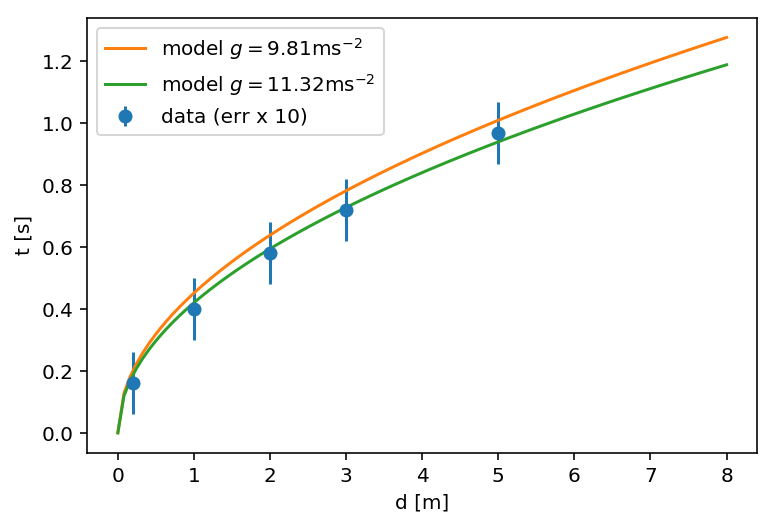

In [26]:
plt.errorbar(d,t,fmt='o',yerr=10*sigma, label='data (err x 10)')
dd = np.linspace(0,8, 100)
plt.plot(dd, np.sqrt(2 * dd / 9.81), label=r'model $g=%.2f \mathrm{ ms}^{-2}$'%9.81)
plt.plot(dd, np.sqrt(2 * dd / g), label=r'model $g=%.2f \mathrm{ ms}^{-2}$'%g)
plt.xlabel('d [m]')
plt.ylabel('t [s]')
plt.legend()

In [27]:
np.sum(np.square((t - np.sqrt(2 * d / g))/sigma))

23.757979839464664

In [28]:
def chi2(g,t0=0.):
    return np.sum(np.square( (t-t0 - np.sqrt(2 * d / g))/sigma))
print ('chi2/ndf = ', chi2(g), '/', (len(d)-1))
#scipy.optimize.minimize(chi2,9.)

chi2/ndf =  23.757979839464664 / 4


Où l'on voit que :
- la valeur obtenue n'est pas compatible avec le résultat attendu.
- le $\chi^2$/ndf est grand devant 1.

### 2. En pratique, l'electro-aimant a un temps de réponse qui n'est pas connu. L'estimer à l'aide de la méthode des moindres carrés.

La fonction $\chi^2$ s'écrit maintenant :
$$\chi^2(g,t_0) = \frac{1}{\sigma^2}\sum_{i=1\ldots n} \left( t_i - \sqrt{\frac{2 d_i}{g}} -t_0\right)^2$$
qui est maximal pour :
$$\begin{array}{rl}
\frac{ \partial\chi^2}{\partial g} &=  \frac{1}{\sigma^2}\sum_{i=1\ldots n}\frac{\sqrt{2 d_i}}{g^{3/2}} \left( t_i - \sqrt{\frac{2 d_i}{g}} - t_0\right)  =  \frac{1}{\sigma^2}\sum_{i=1\ldots n}\frac{\sqrt{2 d_i} t_i}{g^{3/2}}-  \frac{1}{\sigma^2}\sum_{i=1\ldots n} \frac{2 d_i}{g^{2}}  - \frac{1}{\sigma^2}\times \sum_{i=1\ldots n}\frac{\sqrt{2 d_i}}{g^{3/2}} t_0  = 0 \\
\frac{ \partial\chi^2}{\partial t_0} &=  - 2 \frac{1}{\sigma^2}\sum_{i=1\ldots n} \left( t_i - \sqrt{\frac{2 d_i}{g}} - t_0\right) = 0 
\end{array}$$
soit
$$ t_0 = \overline{t} - \sqrt{\frac{2}{g}} \overline{\sqrt{d}}$$
et pour
$$\overline{\sqrt{d} t} - \overline{\sqrt{d}}t_0 -\sqrt{2} \frac{\overline{d}}{\sqrt{g}} = 0$$
soit


$$\overline{\sqrt{d} t} - \overline{\sqrt{d}}\overline{t} -\sqrt{2} \frac{\overline{d}-\overline{\sqrt{d}}^2}{\sqrt{g}} = 0$$



ce qui donne
$$ g = 2 \left(  \frac{\overline{d} - \overline{\sqrt{d}}^2}{\overline{\sqrt{d} t} - \overline{\sqrt{d}}\overline{t}}  \right)^2$$

In [29]:
g = 2*((np.mean(d)-np.mean(np.sqrt(d))**2)/(np.mean(np.sqrt(d)*t)-np.mean(np.sqrt(d))*np.mean(t)))**2
t0 = np.mean(t)-np.sqrt(2./g) * np.mean(np.sqrt(d)) 
delta_g = sigma/np.sqrt(.5*(-3/np.sqrt(2)*np.sum(np.sqrt(d)*(t-t0))/g**(5./2.) + 4.*np.sum(d) / g**3.))
delta_t0 = sigma/np.sqrt(2*len(d))
print ('g =', g, delta_g)
print ('t0 =', t0, delta_t0)
print ('chi2/ndf = ', chi2(g,t0), '/', (len(d)-2))


g = 9.872314205312124 0.13107939862871884
t0 = -0.04879077157710643 0.0031622776601683794
chi2/ndf =  3.8692061671747657 / 3


Où l'on voit que :
- la valeur obtenue est compatible avec le résultat attendu.
- le $\chi^2$/ndf est de l'ordre de 1.

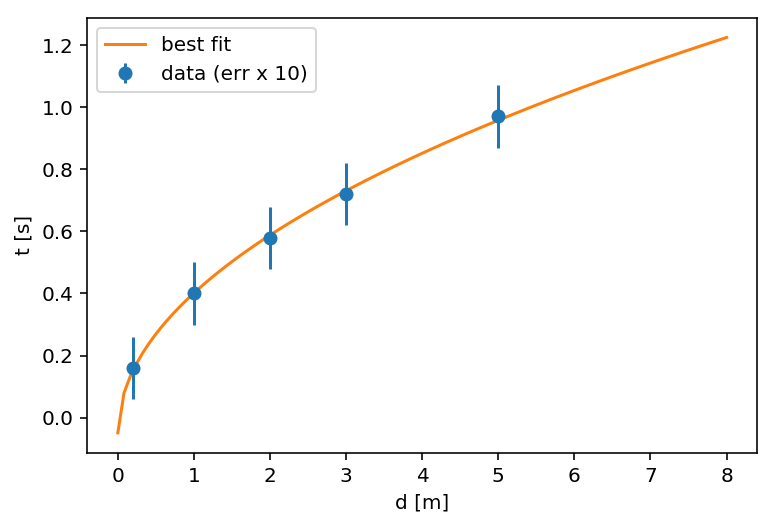

In [30]:
plt.errorbar(d,t,fmt='o',yerr=10*sigma, label='data (err x 10)')
tt = np.sqrt(2 * dd / g)+t0
plt.plot(dd, np.sqrt(2 * dd / g)+t0, label='best fit')
plt.xlabel('d [m]')
plt.ylabel('t [s]')
plt.legend()

# Exo 21 Estimateurs d'une distribution uniforme

Soit $n$ variables aléatoires $X_1,\ldots,X_n$ ayant la même loi uniforme $X$ sur $[0,a]$, c'est à dire ayant pour fonction densité de probabilité :
$$ f(x;a) = \left\{ \begin{array}{cl}  \frac{1}{a} & \textrm{pour } 0\le x\le a \\ 0 & \textrm{sinon} \end{array}\right.$$
où $a$ est un paramètre inconnu. Le but est ici d'estimer $a$ à partir des mesures $x_1, \ldots, x_n$ de $X_1,\ldots,X_n$.

### 1. Calculer $\mathrm{E}(X)$ et $\mathrm{V}(X)$.

$$E(X) = \frac{a}{2}$$
$$V(X) = \frac{a^2}{12}$$

### 2. La méthode des moments  consiste à estimer le ou les paramètres d'une distribution en égalisant certains moments théoriques comme la valeur moyenne ou la variance (qui dépendent de ces paramètres) avec leurs contreparties calculées à partir des données. L'égalisation se justifie par la loi des grands nombres qui implique que l'on peut "approcher" une espérance mathématique par une moyenne empirique. Montrer que $\hat{a} = 2 M_n$ où $M_n = \frac{1}{n}  \sum_{i=1}^{n} X_i$ est un estimateur de $a$ construit à partir de la méthode des moments.

$$E(\frac{1}{n}  \sum_{i=1}^{n} X_i) = \frac{a}{2}$$ d'où l'estimateur :

$$\hat{a} =  \frac{2}{n}  \sum_{i=1}^{n} X_i$$. 

### 3.  Calculer $\mathrm{E}(\hat{a})$ et $\mathrm{V}(\hat{a})$. Conclusion ?

$$E(\hat{a}) = a$$
et 
$$V(\hat{a}) = \frac{a^2}{3n}$$

### 4. Lorsque $n \rightarrow \infty$, vers quelle distribution tend $\hat{a}$ ?

vers une distribution gaussienne $N(a, a/\sqrt{3n})$

### 5. Donner l'expression de la fonction de vraisemblance $\mathrm{L}(a)$ associée aux $n$ mesures $x_1,\ldots,x_n$. Représenter $\mathrm{L}(a)$ en fonction de $a$ entre $a=0$ et $a=\infty$.

La fonction de vraisemblance est donnée par :
$$L(a) = \prod_{i=1 \ldots n} f(x_i) = \prod_{i=1 \ldots n} \frac{1}{a} \mathbb{1}_{x_i<a} = \frac{1}{a^n} \prod_{i=1 \ldots n} \mathbb{1}_{x_i<a} = \frac{1}{a^n}\mathbb{1}_{ \sup_{i=1,\dots,n} x_i <a} $$

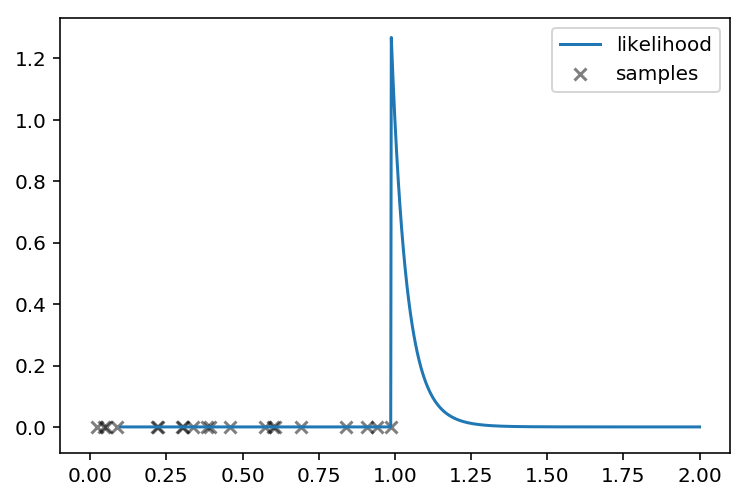

In [31]:
a = 1.
n = 20
x = a*np.random.random(n)
aa = np.linspace(.1, 2.*a, 1000)
y = np.power(1./aa,n)*(np.max(x)<aa)
plt.plot(aa,y, label='likelihood')
plt.scatter(x, np.zeros_like(x), marker='x', 
            color='k', alpha=.5, label='samples')
plt.legend()

### 6. Monter que l'estimateur issue de la méthode du maximum de vraisemblance est $\hat{a}_{\scriptscriptstyle{MV}} = \sup_{i=1,\dots,n} \{ X_i \}.$
  _Ici la fonction $\ln \mathrm{L}(a)$ n'est pas dérivable, il faut rechercher le maximum sans utiliser la dérivée de  $\ln \mathrm{L}(a)$._

Du résultat précédent ( $\mathrm{L}(a)$ en fonction de $a$ entre $a=0$ et $a=\infty$), il est clair que $\mathrm{L}(a)$ est maximum pour $a = \sup_{i=1,\dots,n} \{ x_i \}$, d'où :
$\hat{a}_{\scriptscriptstyle{MV}} = \sup_{i=1,\dots,n} \{ X_i \}.$

### 7. Montrer que :
$$\mathrm{Prob}(\hat{a}_{\scriptscriptstyle{MV}} < z) = \prod_{i=1,\dots,n}  \mathrm{Prob}(X_i < z)$$

Evident compte tenue de la définition de $\hat{a}_{\scriptscriptstyle{MV}}$

### 8. En déduire la  fonction densité de probabilité de $\hat{a}_{\scriptscriptstyle{MV}}$, calculer   $\mathrm{E}(\hat{a}_{\scriptscriptstyle{MV}})$ et  $\mathrm{V}(\hat{a}_{\scriptscriptstyle{MV}})$. Conclusion ?

$$ F(z) = \left\{ \begin{array}{rl} 
0 & z<0 \\
\frac{z^n}{a^n} & 0\le z<a \\
1 & z\ge a
\end{array}
\right.$$
et
$$ f(z) = \left\{ \begin{array}{rl} 
0 & z<0 \\
\frac{n z^{n-1}}{a^n} & 0\le z<a \\
0 & z\ge a
\end{array}
\right.$$

$$E(\hat{a}_{\scriptscriptstyle{MV}}) = \int_0^a z f(z) dz = \frac{n}{n+1} a$$
$$E(\hat{a}_{\scriptscriptstyle{MV}}^2) = \int_0^a z^2 f(z) dz = \frac{n}{n+2} a^2$$
$$V(\hat{a}_{\scriptscriptstyle{MV}}) = \left(\frac{n}{n+2} - \frac{n^2}{(n+1)^2}\right) a^2 =\frac{n}{(n+2)(n+1)^2}a^2  \sim_{n \rightarrow \infty} \frac{a^2}{n^2}$$

### 9. Montrer  que l'estimateur $\hat{a}_{s}= \frac{n+1}{n}\hat{a}_{\scriptscriptstyle{MV}}$ est non-biasé. Calculer $\mathrm{V}(\hat{a}_{s})$, comparer cet estimateur à l'estimateur $\hat{a}$ issue de la méthode des moments. Justifier son status d'estimateur super efficace.

$$E(\hat{a}_s) =  a$$
$$V(\hat{a}_s) = \frac{1}{(n+2)n}a^2  \sim_{n \rightarrow \infty} \frac{a^2}{n^2}$$

La variance varie en $1/n^2$ et décroit donc beaucoup plus rapidement avec $n$, d'où son status d'estimateur super efficace.

### 10. Soit $$X_{(1)}  = \inf_{i=1,\dots,n} \{ X_i \},$$ calculer $\mathrm{E}(X_{(1)})$ et $\mathrm{V}(X_{(1)})$.
_Indication : Les valeurs prises par fonction Beta sont données par~:
$$\mathrm{B} ( p , q) = \int_0^1 x^{p-1} (1-x)^{q-1} dx = \frac { (p-1) ! (q-1) ! }{ (p+q-1)!}$$_

$$\mathrm{Prob}(X_{(1)} > z) = \prod_{i=1,\dots,n}  \mathrm{Prob}(X_i > z)$$

$$1 - F_{(1)}(z) =  \left\{ \begin{array}{rl} 
1 & z<0 \\
\left(1-\frac{z}{a}\right)^n & 0\le z<a \\
0 & z\ge a
\end{array}
\right.$$
$$F_{(1)}(z) =  \left\{ \begin{array}{rl} 
0 & z<0 \\
1-\left(1-\frac{z}{a}\right)^n & 0\le z<a \\
1 & z\ge a
\end{array}
\right.$$
$$f_{(1)}(z) =  \left\{ \begin{array}{rl} 
0 & z<0 \\
\frac{n}{a}\left(1-\frac{z}{a}\right)^{n-1} & 0\le z<a \\
0 & z\ge a
\end{array}
\right.$$

$$E(X_{(1)} ) = \int_0^a z f_{(1)}(z) dz = n \int_0^a \frac{z}{a}\left(1-\frac{z}{a}\right)^{n-1} dz = \frac{a}{n+1}$$
$$E(\hat{a}_{(1)}^2) = \int_0^a z^2 f_{(1)}(z) dz = \frac{2}{(n+1)(n+2)} a^2$$
$$V(\hat{a}_{(1)}) = \left(\frac{2}{(n+1)(n+2)} - \frac{1}{(n+1)^2}\right) a^2 = \frac{n}{(n+1)^2(n+2)}$$

### 11. Soit $\hat{a}_{\scriptscriptstyle{NC}} = (n+1) X_{(1)}$ un nouvel estimateur. Cet estimateur est-il biaisé, est-il efficace~? 

$$E(\hat{a}_(1)) =  a$$
$$V(\hat{a}_(1)) = \frac{n}{n+2}a^2  \sim_{n \rightarrow \infty} a^2$$



### 12. Parmi les estimateurs proposés, lequel vous semble le plus performant. 

Le code ci-dessous permet d'obtenir la distribution des 3 estimateurs

In [32]:
a = 1.
def exo21(n=20):
    est =[]
    for i in range(10000):
        x = a*np.random.random(n)
        est.append([2*np.mean(x),float(n+1)/float(n)*np.max(x), (float(n)+1.)*np.min(x)])
    nest = np.array(est)
    bins = np.linspace(0.5*a,1.5*a,50*int(1+np.sqrt(n/10)))
    plt.hist(nest[...,0],bins,alpha=.5,density=True, label=r'$\hat{a}$')
    plt.hist(nest[...,1],bins,alpha=.5,density=True, label=r'$\hat{a}_S$')
    plt.hist(nest[...,2],bins,alpha=.5,density=True, label=r'$\hat{a}_{NC}$')
    plt.legend()

interact(exo21,  n = IntSlider(min=5, max=200, step =5))



interactive(children=(IntSlider(value=5, description='n', max=200, min=5, step=5), Output()), _dom_classes=('w…

<function __main__.exo21(n=20)>

Où on voit bien que l'estimateur super efficace est beaucoup plus performant. De manière plus quantitative, on peut calculer la déviation standart de chaque estimateur en fonction de $n$ et comparer aux valeurs théoriques calculées plus haut : 

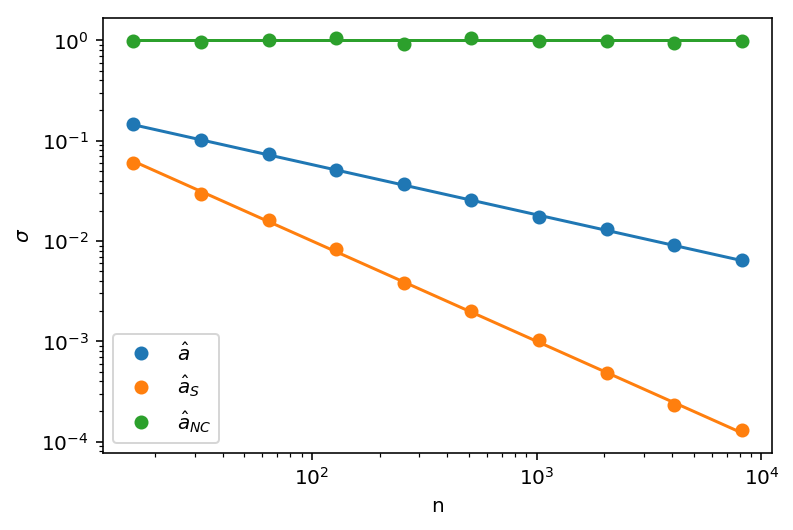

In [33]:
nn = np.array([ 2**i for i in range(4,14)])
st = []
for n in nn:
    est =[]
    for i in range(1000):
        x = a*np.random.random(n)
        est.append([2*np.mean(x),float(n+1)/float(n)*np.max(x), (float(n)+1.)*np.min(x)])
    nest = np.array(est)
    st.append([np.std(nest[...,0]), np.std(nest[...,1]), np.std(nest[...,2])])
st = np.array(st)
plt.plot(nn, st[...,0], 'o', label=r'$\hat{a}$')
plt.plot(nn, st[...,1], 'o', label=r'$\hat{a}_S$')
plt.plot(nn, st[...,2], 'o', label=r'$\hat{a}_{NC}$')
plt.gca().set_prop_cycle(None)
plt.plot(nn, a/np.sqrt(3*nn)) # \hat{a}
plt.plot(nn, a/nn) # \hat{a}_S
plt.plot(nn, a*nn/nn) #\hat{a}_{NC}
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel(r'$\sigma$')
plt.legend()

La figure précédente montre clairement que l'estimateur $\hat{a}_s$ est le plus performant.